In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
# Load dataset
data = pd.read_csv('file_updated4.csv')

# Mengonversi kolom 'Jawaban' dari string menjadi list
data['Jawaban'] = data['Jawaban'].apply(lambda x: eval(x))  # Mengubah string list menjadi list Python

#------------------------------------------------------------------------------------
# Preprocessing Produk
# Initialize MultiLabelBinarizer for Produk
label_encoder_produk = MultiLabelBinarizer()

# Split the 'Produk' column by commas to create a list of products
data['Produk'] = data['Produk'].apply(lambda x: x.split(', '))

# Apply MultiLabelBinarizer to encode the 'Produk' column
produk_encoded = label_encoder_produk.fit_transform(data['Produk'])

#Printout
print("Produk Desc")
print(produk_encoded.shape)  # Shape of the encoded matrix
print(produk_encoded[:2])  # Displaying first two rows of the encoded data
print("Produk classes:", label_encoder_produk.classes_)

#------------------------------------------------------------------------------------
# Preprocessing Fitur
#Initialize MultiLabelBinarizer for Fitur
label_encoder_fitur = MultiLabelBinarizer()

# Split the 'Fitur' column by commas to create a list of products
data['Fitur'] = data['Fitur'].apply(lambda x: x.split(', '))

# Apply MultiLabelBinarizer to encode the 'Fitur' column
fitur_encoded = label_encoder_fitur.fit_transform(data['Fitur'])

#Printout
print("Fitur Desc")
print(fitur_encoded.shape)
print(fitur_encoded[:2])
print("Fitur classes:", label_encoder_fitur.classes_)

#------------------------------------------------------------------------------------
# Preprocessing Bahan
# Initialize MultiLabelBinarizer for Bahan
bahan_binarizer = MultiLabelBinarizer()

# Split the 'Bahan' column by commas to create a list of products
data['Bahan'] = data['Bahan'].apply(lambda x: x.split(', '))  # Pastikan bahan berbentuk list

# Apply MultiLabelBinarizer to encode the 'Bahan' column
bahan_encoded = bahan_binarizer.fit_transform(data['Bahan'])

#Printout
print("Bahan Desc")
print(bahan_encoded.shape)
print(bahan_encoded[:2])
print("Bahan yang terpisah:", bahan_binarizer.classes_)

#------------------------------------------------------------------------------------
# Mengubah kolom 'Jawaban' menjadi array numpy
X = np.array(data['Jawaban'].tolist())  # Mengubah list ke dalam array

# Output Labels
y_produk = produk_encoded
y_fitur = fitur_encoded
y_bahan = bahan_encoded

# Normalize Input
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_produk_train, y_produk_test, y_fitur_train, y_fitur_test, y_bahan_train, y_bahan_test = train_test_split(
    X, y_produk, y_fitur, y_bahan, test_size=0.2, random_state=42
)

print('Produk shape:', y_produk_train.shape)
print('Fitur shape:', y_fitur_train.shape)
print('Bahan shape:', y_bahan_train.shape)


Produk Desc
(30000, 10)
[[0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 1 0 0 0]]
Produk classes: ['Booster' 'Calming Mask' 'Cleanser' 'Essence' 'Mask' 'Moisturizer'
 'Serum' 'Spot Treatment' 'Sunscreen' 'Toner']
Fitur Desc
(30000, 15)
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]]
Fitur classes: ['Acne Free' 'Acne Prevention' 'Acne Treatment' 'Balanced'
 'Balanced Hydration' 'Balancing' 'Calming' 'Custom Care' 'Hydrating'
 'Minimal Care' 'Oil Control' 'Pore Care' 'Protective' 'Soothing'
 'UV Protection']
Bahan Desc
(30000, 12)
[[1 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 0]]
Bahan yang terpisah: ['Allantoin' 'Aloe Vera' 'Bakuchiol' 'Ceramide' 'Cica' 'Glycerin' 'Glycol'
 'Niacinamide' 'Panthenol' 'Retinol' 'Salicylic Acid' 'Water']
Produk shape: (24000, 10)
Fitur shape: (24000, 15)
Bahan shape: (24000, 12)


In [4]:
# Mengubah kolom 'Jawaban' menjadi array numpy
X = np.array(data['Jawaban'].tolist())  # Mengubah list ke dalam array

# Output Labels
y_produk = produk_encoded
y_fitur = fitur_encoded
y_bahan = bahan_encoded

# Normalize Input
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_produk_train, y_produk_test, y_fitur_train, y_fitur_test, y_bahan_train, y_bahan_test = train_test_split(
    X, y_produk, y_fitur, y_bahan, test_size=0.2, random_state=42
)


In [5]:
# Define ANN model
input_layer = Input(shape=(14,))

# Hidden layers
hidden_layer1 = Dense(512, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(hidden_layer1)
dropout1 = Dropout(0.1)(batch_norm1)

hidden_layer2 = Dense(256, activation='relu')(dropout1)
batch_norm2 = BatchNormalization()(hidden_layer2)
dropout2 = Dropout(0.1)(batch_norm2)

hidden_layer3 = Dense(128, activation='relu')(dropout2)
batch_norm3 = BatchNormalization()(hidden_layer3)

# Output layers
output_produk = Dense(12, activation='sigmoid', name='Produk_Output')(batch_norm3)
output_fitur = Dense(15, activation='sigmoid', name='Fitur_Output')(batch_norm3)
output_bahan = Dense(10, activation='sigmoid', name='Bahan_Output')(batch_norm3)


# Combine model
model = Model(inputs=input_layer, outputs=[output_produk, output_fitur, output_bahan])

# Compile model
optimizer = SGD(learning_rate=0.0065, momentum=0.95, nesterov=True)

model.compile(optimizer=optimizer,
              loss={'Produk_Output': 'binary_crossentropy',
                    'Fitur_Output': 'binary_crossentropy',
                    'Bahan_Output': 'binary_crossentropy'},
              metrics={'Produk_Output': 'accuracy',
                       'Fitur_Output': 'accuracy',
                       'Bahan_Output': 'accuracy'})

model.summary()

# Early stopping callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Latih model dengan sample weights
history = model.fit(
    X_train,
    {'Produk_Output': y_produk_train, 'Fitur_Output': y_fitur_train, 'Bahan_Output': y_bahan_train},
    epochs=70,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate model
results = model.evaluate(
    X_test,
    {'Produk_Output': y_produk_test, 'Fitur_Output': y_fitur_test, 'Bahan_Output': y_bahan_test},
    verbose=0
)

# Unpack the results and print
total_loss = results[0]
produk_loss = results[1]
fitur_loss = results[2]
bahan_loss = results[3]
produk_acc = results[4]
fitur_acc = results[5]
bahan_acc = results[6]

print(f"Total Loss: {total_loss:.2f}")
print(f"Produk Loss: {produk_loss:.2f}, Accuracy: {produk_acc:.2f}")
print(f"Fitur Loss: {fitur_loss:.2f}, Accuracy: {fitur_acc:.2f}")
print(f"Bahan Loss: {bahan_loss:.2f}, Accuracy: {bahan_acc:.2f}")



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 14)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 512)               │           7,680 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 512)               │           2,048 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 512)               │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 256)               │         131,328 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 256)               │           1,024 │ dense_1[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 256)               │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 128)               │          32,896 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 128)               │             512 │ dense_2[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Produk_Output (Dense)         │ (None, 12)                │           1,548 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Fitur_Output (Dense)          │ (None, 15)                │           1,935 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Bahan_Output (Dense)          │ (None, 10)                │           1,290 │ batch_normalization_2[0][… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 180,261 (704.14 KB)

 Trainable params: 178,469 (697.14 KB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/70
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Bahan_Output_accuracy: 0.0584 - Bahan_Output_loss: 0.4268 - Fitur_Output_accuracy: 0.2778 - Fitur_Output_loss: 0.4670 - Produk_Output_accuracy: 0.0652 - Produk_Output_loss: 0.4693 - loss: 1.3630 - val_Bahan_Output_accuracy: 0.0121 - val_Bahan_Output_loss: 0.2146 - val_Fitur_Output_accuracy: 0.3871 - val_Fitur_Output_loss: 0.2431 - val_Produk_Output_accuracy: 0.0550 - val_Produk_Output_loss: 0.2663 - val_loss: 0.7240
Epoch 2/70
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Bahan_Output_accuracy: 0.0315 - Bahan_Output_loss: 0.2229 - Fitur_Output_accuracy: 0.3705 - Fitur_Output_loss: 0.2439 - Produk_Output_accuracy: 0.0663 - Produk_Output_loss: 0.2739 - loss: 0.7406 - val_Bahan_Output_accuracy: 0.0325 - val_Bahan_Output_loss: 0.1856 - val_Fitur_Output_accuracy: 0.4121 - val_Fitur_Output_loss: 0.2070 - val_Produk_Output_accuracy: 0.0729 - val_Produk_Output_loss: 0.2313 - val_loss: 0.6238
Epoch 3/70
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

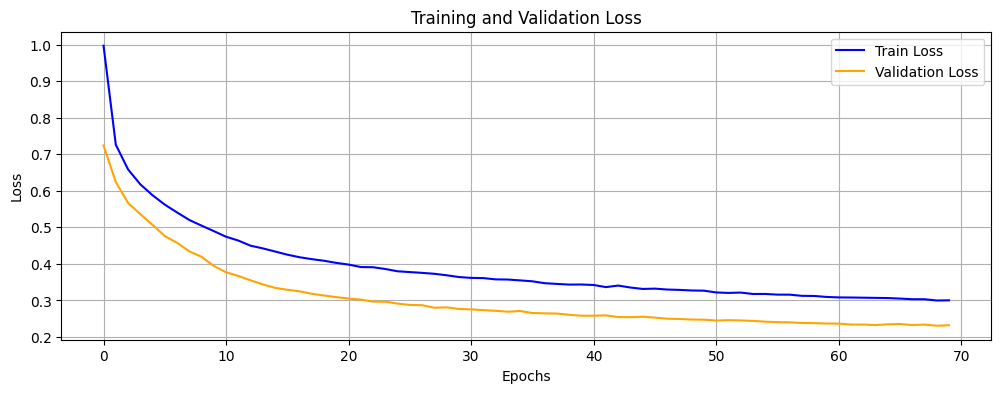

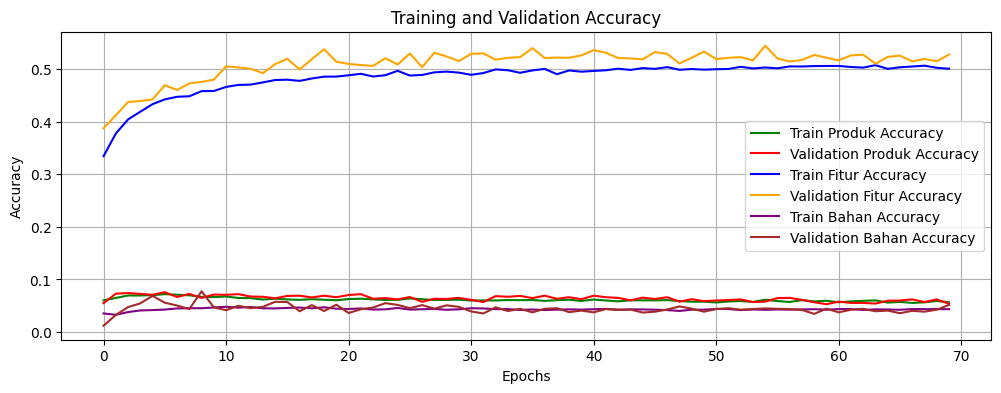

In [6]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['Produk_Output_accuracy'], label='Train Produk Accuracy', color='green')
plt.plot(history.history['val_Produk_Output_accuracy'], label='Validation Produk Accuracy', color='red')
plt.plot(history.history['Fitur_Output_accuracy'], label='Train Fitur Accuracy', color='blue')
plt.plot(history.history['val_Fitur_Output_accuracy'], label='Validation Fitur Accuracy', color='orange')
plt.plot(history.history['Bahan_Output_accuracy'], label='Train Bahan Accuracy', color='purple')
plt.plot(history.history['val_Bahan_Output_accuracy'], label='Validation Bahan Accuracy', color='brown')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [7]:
# Normalize X_test using the same scaler as training
X_test_normalized = scaler.transform(X_test)
print(X_test_normalized[1])

# Predict for X_test
produk_pred, fitur_pred, bahan_pred = model.predict(X_test_normalized)

print(produk_pred[:2])
print(produk_pred.shape)
print(fitur_pred[:2])
print(fitur_pred.shape)
print(bahan_pred[:2])
print(bahan_pred.shape)


bin_produk_pred = (np.array(produk_pred) > 0.5).astype(int)
print(bin_produk_pred[100])
bahan_labels = bahan_binarizer.inverse_transform(bin_produk_pred)
print(bahan_labels[990])


bin_fitur_pred = (np.array(fitur_pred) > 0.5).astype(int)
print(bin_fitur_pred[20])
fitur_labels = label_encoder_fitur.inverse_transform(bin_fitur_pred)
print(fitur_labels[20])

bin_bahan_pred = (np.array(bahan_pred) > 0.5).astype(int)
print(bin_bahan_pred[20])
produk_labels = label_encoder_produk.inverse_transform(bin_bahan_pred)
print(produk_labels[20])

# Display predictions for the first few samples
for i in range(10):  # Displaying results for the first 5 test samples
    print(f"Sample {i + 1}:")
    print(f"Rekomendasi Produk: {produk_labels[i]}")
    print(f"Rekomendasi Fitur: {', '.join(fitur_labels[i])}")
    print(f"Rekomendasi Bahan: {', '.join(bahan_labels[i])}")
    print("-" * 30)


[-0.11111111 -0.33333333 -0.11111111  0.         -0.11111111 -0.22222222
 -0.11111111 -0.11111111  0.          0.         -0.11111111 -0.22222222
  0.         -0.11111111]
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[9.9999982e-01 2.0040994e-14 1.2119543e-15 9.9999881e-01 9.9803948e-01
  1.0000000e+00 5.8838717e-19 1.1669343e-09 8.9435035e-01 3.0741537e-19
  2.8588565e-07 3.6287620e-10]
 [9.9991268e-01 7.0882404e-11 2.0312457e-10 9.9076235e-01 9.9800253e-01
  9.9999678e-01 4.9875022e-12 6.7131566e-03 4.3472168e-03 1.3194258e-12
  3.2284934e-05 2.0569091e-06]]
(6000, 12)
[[2.9575883e-10 3.9138419e-18 1.3277927e-11 1.9333096e-11 4.2914513e-19
  1.7692875e-07 9.9559450e-01 4.2275752e-09 1.0000000e+00 6.7592640e-14
  5.7965188e-19 9.5208661e-13 1.1141809e-06 3.4104936e-10 2.0639222e-06]
 [3.2623397e-05 8.6733658e-12 3.8597740e-08 1.2943747e-08 2.6077682e-10
  4.9649884e-08 9.9898297e-01 1.6178275e-07 9.9995583e-01 1.1237377e-09
  1.0440732e-10 7.4788130e-07 2.7642186e-06 3.0784406e-09 1.8984

In [8]:
# Simpan model ke dalam format .h5
model.save('model_rekomendasi6plzzzz.h5')
print("Model berhasil disimpan dalam format .h5")


Model berhasil disimpan dalam format .h5
